<a href="https://colab.research.google.com/github/012345-M/Data-anlayse-python-projects/blob/main/Python_data_cleaning_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
missing_values= ['NaN','n/a','na','--']
land= pd.read_csv("https://raw.githubusercontent.com/nitinkaushik01/Machine_Learning_Data_Preprocessing_Python/master/Sample_real_estate_data.csv",na_values=missing_values)
land.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
# explore the data
land.shape

(9, 7)

In [ ]:
land.describe()

,PID,ST_NUM,NUM_BEDROOMS,SQ_FT
count,8.000000e+00,7.000000,6.000000,8.000000
mean,1.000050e+08,191.428571,2.166667,975.000000
std,2.927700e+03,39.080503,0.983192,529.150262
min,1.000010e+08,104.000000,1.000000,100.000000
25%,1.000028e+08,199.000000,1.250000,775.000000
50%,1.000050e+08,203.000000,2.500000,900.000000
75%,1.000072e+08,210.000000,3.000000,1150.000000
max,1.000090e+08,215.000000,3.000000,1800.000000


In [ ]:
land.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  6 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         8 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [ ]:
#see the null values
land.isnull().sum().sort_values(ascending=False)


NUM_BEDROOMS    3
OWN_OCCUPIED    2
ST_NUM          2
SQ_FT           1
NUM_BATH        1
PID             1
ST_NAME         0
dtype: int64

In [ ]:
# see teh null values with percentage 
round(land.isnull().sum().sort_values(ascending=False)/len(land)*100,1)

NUM_BEDROOMS    33.3
OWN_OCCUPIED    22.2
ST_NUM          22.2
SQ_FT           11.1
NUM_BATH        11.1
PID             11.1
ST_NAME          0.0
dtype: float64

In [ ]:
# see teh data with more then 2 missing values
np.where(land.isnull().sum(axis=1)>1)

(array([2, 3, 6]),)

In [ ]:
# fill teh PID with median
median= land['PID'].median()
land['PID'].fillna(median, inplace=True)
land




,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,100.0
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [ ]:
# drop irrelevent column
land= land.drop(['ST_NAME'],axis=1)

In [ ]:
# delete rows with only 1 missing value row 5
land = land.drop(land.index[5])
land

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,Y,3.0,1,1000.0
1,100002000.0,197.0,N,3.0,1.5,100.0
2,100003000.0,NaN,N,NaN,1,850.0
3,100004000.0,201.0,NaN,1.0,NaN,700.0
4,100005000.0,203.0,Y,3.0,2,1600.0
7,100008000.0,213.0,Y,1.0,1,NaN
8,100009000.0,215.0,Y,NaN,2,1800.0


In [ ]:
land.shape # deleted one row with only 1 missing value

(7, 6)

In [ ]:
# removed the name column and one irrelevent row 5 
land.head()

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,Y,3.0,1,1000.0
1,100002000.0,197.0,N,3.0,1.5,100.0
2,100003000.0,NaN,N,NaN,1,850.0
3,100004000.0,201.0,NaN,1.0,NaN,700.0
4,100005000.0,203.0,Y,3.0,2,1600.0


In [ ]:
Mean_value=land['ST_NUM'].mean()
print('Mean od ST_NUM IS:')
print(Mean_value)

Mean od ST_NUM IS:
188.83333333333334


In [ ]:
# putting in mean in numeric data
land['ST_NUM'].fillna(value=land['ST_NUM'].mean(), inplace=True)
land

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,Y,3.0,1,1000.0
1,100002000.0,197.000000,N,3.0,1.5,100.0
2,100003000.0,188.833333,N,NaN,1,850.0
3,100004000.0,201.000000,NaN,1.0,NaN,700.0
4,100005000.0,203.000000,Y,3.0,2,1600.0
7,100008000.0,213.000000,Y,1.0,1,NaN
8,100009000.0,215.000000,Y,NaN,2,1800.0


In [ ]:
land.head(10)

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,Y,3.0,1,1000.0
1,100002000.0,197.000000,N,3.0,1.5,100.0
2,100003000.0,188.833333,N,NaN,1,850.0
3,100004000.0,201.000000,NaN,1.0,NaN,700.0
4,100005000.0,203.000000,Y,3.0,2,1600.0
7,100008000.0,213.000000,Y,1.0,1,NaN
8,100009000.0,215.000000,Y,NaN,2,1800.0


In [ ]:
# filling NUM_BATH, SQ_FT with KNN imputer
from sklearn.impute import KNNImputer
knn_impute= KNNImputer(n_neighbors=5)
land[['NUM_BATH','SQ_FT']]=knn_impute.fit_transform(land[['NUM_BATH','SQ_FT']])
land
 


,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,Y,3.0,1.0,1000.0
1,100002000.0,197.000000,N,3.0,1.5,100.0
2,100003000.0,188.833333,N,NaN,1.0,850.0
3,100004000.0,201.000000,NaN,1.0,1.5,700.0
4,100005000.0,203.000000,Y,3.0,2.0,1600.0
7,100008000.0,213.000000,Y,1.0,1.0,1070.0
8,100009000.0,215.000000,Y,NaN,2.0,1800.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


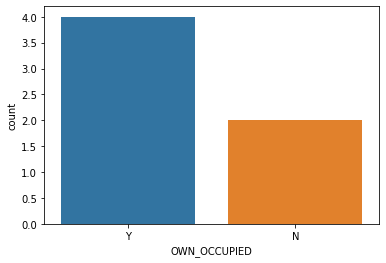

In [ ]:
sns.countplot(land['OWN_OCCUPIED'])

In [ ]:
from statistics import mode                                                       # 1st method for category data mode
land['OWN_OCCUPIED']=land['OWN_OCCUPIED'].fillna(value=mode(land['OWN_OCCUPIED']))
land.isnull().sum()

PID             0
ST_NUM          0
OWN_OCCUPIED    0
NUM_BEDROOMS    2
NUM_BATH        0
SQ_FT           0
dtype: int64

In [ ]:
land.head(10)

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,Y,3.0,1.0,1000.0
1,100002000.0,197.000000,N,3.0,1.5,100.0
2,100003000.0,188.833333,N,NaN,1.0,850.0
3,100004000.0,201.000000,Y,1.0,1.5,700.0
4,100005000.0,203.000000,Y,3.0,2.0,1600.0
7,100008000.0,213.000000,Y,1.0,1.0,1070.0
8,100009000.0,215.000000,Y,NaN,2.0,1800.0


In [ ]:
# fill the NUM_BEDROOMS with mean 
from sklearn.experimental import enable_iterative_imputer  # you can inport decision tree, KNN , random forest or regression to predict missing values
from sklearn.impute import IterativeImputer 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
fill_values= IterativeImputer(estimator= LinearRegression())
land[['NUM_BEDROOMS']]=fill_values.fit_transform(land[['NUM_BEDROOMS']])
land.isnull().sum()             # 0 null values

PID             0
ST_NUM          0
OWN_OCCUPIED    0
NUM_BEDROOMS    0
NUM_BATH        0
SQ_FT           0
dtype: int64

In [ ]:
# no null values
land.head(10)        

,PID,ST_NUM,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.000000,Y,3.0,1.0,1000.0
1,100002000.0,197.000000,N,3.0,1.5,100.0
2,100003000.0,188.833333,N,2.2,1.0,850.0
3,100004000.0,201.000000,Y,1.0,1.5,700.0
4,100005000.0,203.000000,Y,3.0,2.0,1600.0
7,100008000.0,213.000000,Y,1.0,1.0,1070.0
8,100009000.0,215.000000,Y,2.2,2.0,1800.0


In [ ]:
# first find teh data types 
land.dtypes

PID             float64
ST_NUM          float64
OWN_OCCUPIED     object
NUM_BEDROOMS    float64
NUM_BATH        float64
SQ_FT           float64
dtype: object

In [ ]:
# change data to teh correct type for columns and store it
land['PID']= land['PID'].astype('int64')
land['ST_NUM']= land['ST_NUM'].astype('int64')
land['OWN_OCCUPIED']= land['OWN_OCCUPIED'].astype('category')
land['SQ_FT']= land['SQ_FT'].astype('int64')
land['NUM_BEDROOMS']= land['NUM_BEDROOMS'].astype('int64')
land.dtypes

PID                int64
ST_NUM             int64
OWN_OCCUPIED    category
NUM_BEDROOMS       int64
NUM_BATH         float64
SQ_FT              int64
dtype: object

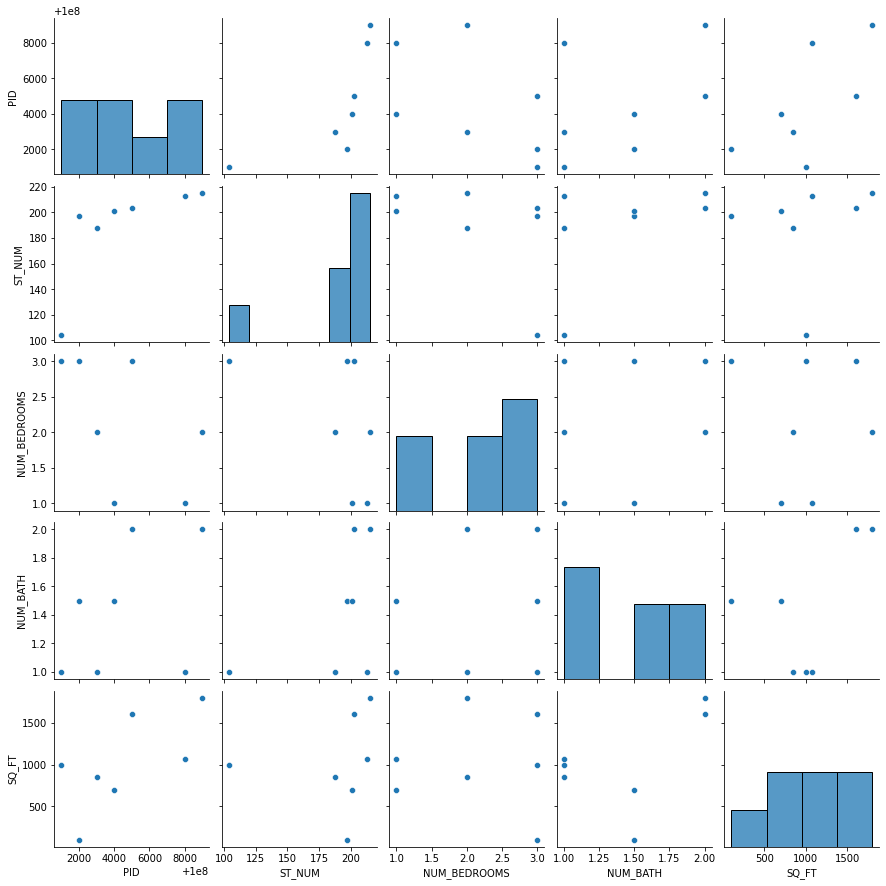

In [ ]:
# see which Mechine learning model to use although we will use all
sns.pairplot(land)

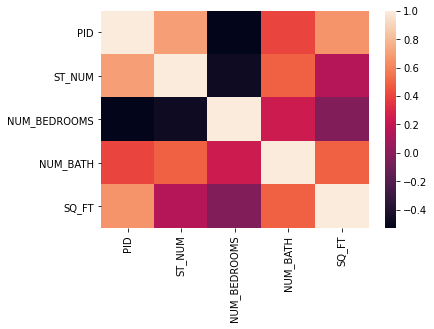

In [ ]:
# telling the corrilation between variables 
sns.heatmap(land.corr())

In [ ]:
# regression model linear and multiple regression
land.columns

Index(['PID', 'ST_NUM', 'OWN_OCCUPIED', 'NUM_BEDROOMS', 'NUM_BATH', 'SQ_FT'], dtype='object')

In [ ]:
# the OWN_OCCUPIED column we want to change to numeric
land.iloc[:,2]

0    Y
1    N
2    N
3    Y
4    Y
7    Y
8    Y
Name: OWN_OCCUPIED, dtype: category
Categories (2, object): ['N', 'Y']

In [ ]:
land.OWN_OCCUPIED.value_counts()

Y    5
N    2
Name: OWN_OCCUPIED, dtype: int64

In [ ]:
# Encoding the categorical data to numeric for regression analyses
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
land['OWN_OCCUPIEDle']= le.fit_transform(land.OWN_OCCUPIED)

In [ ]:
land.OWN_OCCUPIEDle.value_counts()

1    5
0    2
Name: OWN_OCCUPIEDle, dtype: int64

In [ ]:
# predicting the sqaure feet of the land 
# split the data into x independent variables and y dependent predicting varible
x= land[['PID', 'ST_NUM','OWN_OCCUPIEDle', 'NUM_BEDROOMS', 'NUM_BATH']]
x

,PID,ST_NUM,OWN_OCCUPIEDle,NUM_BEDROOMS,NUM_BATH
0,100001000,104,1,3,1.0
1,100002000,197,0,3,1.5
2,100003000,188,0,2,1.0
3,100004000,201,1,1,1.5
4,100005000,203,1,3,2.0
7,100008000,213,1,1,1.0
8,100009000,215,1,2,2.0


In [ ]:
y= land['SQ_FT']
y

0    1000
1     100
2     850
3     700
4    1600
7    1070
8    1800
Name: SQ_FT, dtype: int64

In [ ]:
land= land.drop(['OWN_OCCUPIED'],axis=1)

In [ ]:
land.head()

,PID,ST_NUM,NUM_BEDROOMS,NUM_BATH,SQ_FT,OWN_OCCUPIEDle
0,100001000,104,3,1.0,1000,1
1,100002000,197,3,1.5,100,0
2,100003000,188,2,1.0,850,0
3,100004000,201,1,1.5,700,1
4,100005000,203,3,2.0,1600,1


In [ ]:
# split the data using train_test_split approch
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# build and train the model
from sklearn.linear_model import LinearRegression
model= LinearRegression()
# use fit sk learn method to train teh model in the training data
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred= model.predict(x_test)
y_pred

array([8545.57579879,  986.99188863])

In [ ]:
# calculateR-square value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
# this means teh data is very less to use this model we need more data to get better R-square

-23240.879380325056

In [ ]:
print(model.coef_)

[ 3.82607611e-01 -8.91291329e+01  7.13063006e+02  2.60880848e+02
  3.47777919e+02]


In [ ]:
print(model.intercept_)

-38245172.16328561


In [ ]:
# can be represented a better way
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])
# This shows if 1 NUM_BATH increase, this would lead to 347.777919 increase in SQ_FT of land

,Coeff
PID,0.382608
ST_NUM,-89.129133
OWN_OCCUPIEDle,713.063006
NUM_BEDROOMS,260.880848
NUM_BATH,347.777919


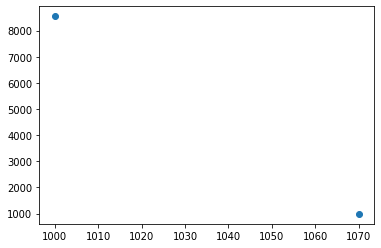

In [ ]:
plt.scatter(y_test, y_pred)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-7545.57579879, -6782.71740777, -6019.85901676, -5257.00062574,
        -4494.14223472, -3731.28384371, -2968.42545269, -2205.56706168,
        -1442.70867066,  -679.85027964,    83.00811137]),
 <a list of 10 Patch objects>)

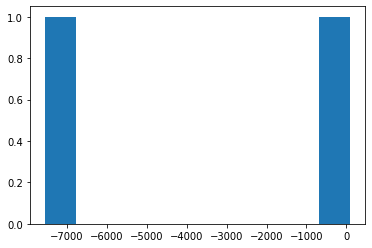

In [ ]:
plt.hist(y_test - y_pred)

In [ ]:
# test the performance of teh model with mean absolute error
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

3814.2919550798833

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

28471302.240898192

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

5335.850657664455